**Install important libararies for work**

In [1]:
pip install numpy pandas matplotlib scikit-learn tensorflow flask


**Libraries Import**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout



**Dataset upload **

In [4]:
# Load and preprocess the data
data = pd.read_csv('Google_train_data.csv')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data.dropna(inplace=True)

# Select the "Close" column
train_data = data.iloc[:, 4:5].values

**Scaling and Preparation of Training Data**

In [5]:

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)

# Prepare training data
X_train, y_train = [], []
timestep = 60
for i in range(timestep, len(train_data_scaled)):
    X_train.append(train_data_scaled[i-timestep:i, 0])
    y_train.append(train_data_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



**Build LSTM MODEL**

In [6]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Training of model**

Epoch 1/20
35/35 - 14s - 409ms/step - loss: 0.0358
Epoch 2/20
35/35 - 8s - 236ms/step - loss: 0.0120
Epoch 3/20
35/35 - 12s - 330ms/step - loss: 0.0091
Epoch 4/20
35/35 - 8s - 215ms/step - loss: 0.0078
Epoch 5/20
35/35 - 8s - 224ms/step - loss: 0.0076
Epoch 6/20
35/35 - 9s - 257ms/step - loss: 0.0073
Epoch 7/20
35/35 - 9s - 262ms/step - loss: 0.0069
Epoch 8/20
35/35 - 11s - 307ms/step - loss: 0.0069
Epoch 9/20
35/35 - 6s - 174ms/step - loss: 0.0069
Epoch 10/20
35/35 - 10s - 280ms/step - loss: 0.0069
Epoch 11/20
35/35 - 7s - 206ms/step - loss: 0.0058
Epoch 12/20
35/35 - 9s - 262ms/step - loss: 0.0071
Epoch 13/20
35/35 - 10s - 281ms/step - loss: 0.0066
Epoch 14/20
35/35 - 7s - 201ms/step - loss: 0.0049
Epoch 15/20
35/35 - 9s - 271ms/step - loss: 0.0051
Epoch 16/20
35/35 - 10s - 272ms/step - loss: 0.0052
Epoch 17/20
35/35 - 10s - 292ms/step - loss: 0.0051
Epoch 18/20
35/35 - 8s - 216ms/step - loss: 0.0044
Epoch 19/20
35/35 - 8s - 237ms/step - loss: 0.0050
Epoch 20/20
35/35 - 10s - 294ms/s

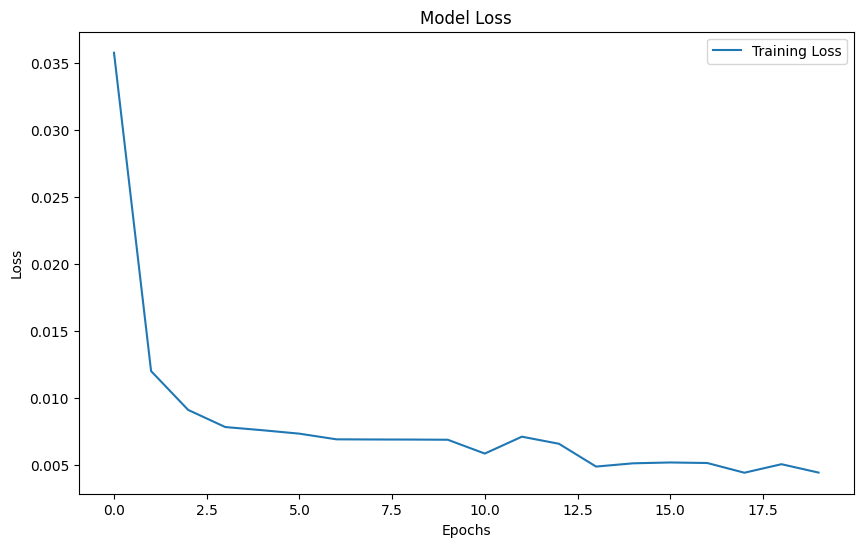

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Loading and Preparing Test Data**

In [8]:

# Load test data
test_data = pd.read_csv('Google_test_data.csv')
test_data['Close'] = pd.to_numeric(test_data['Close'], errors='coerce')
test_data.dropna(inplace=True)

# Prepare test data
real_prices = test_data.iloc[:, 4:5].values
total_data = pd.concat((data['Close'], test_data['Close']), axis=0)
inputs = total_data[len(total_data) - len(test_data) - timestep:].values.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(timestep, len(inputs)):
    X_test.append(inputs[i-timestep:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))



**Prediction and Visualization**

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step


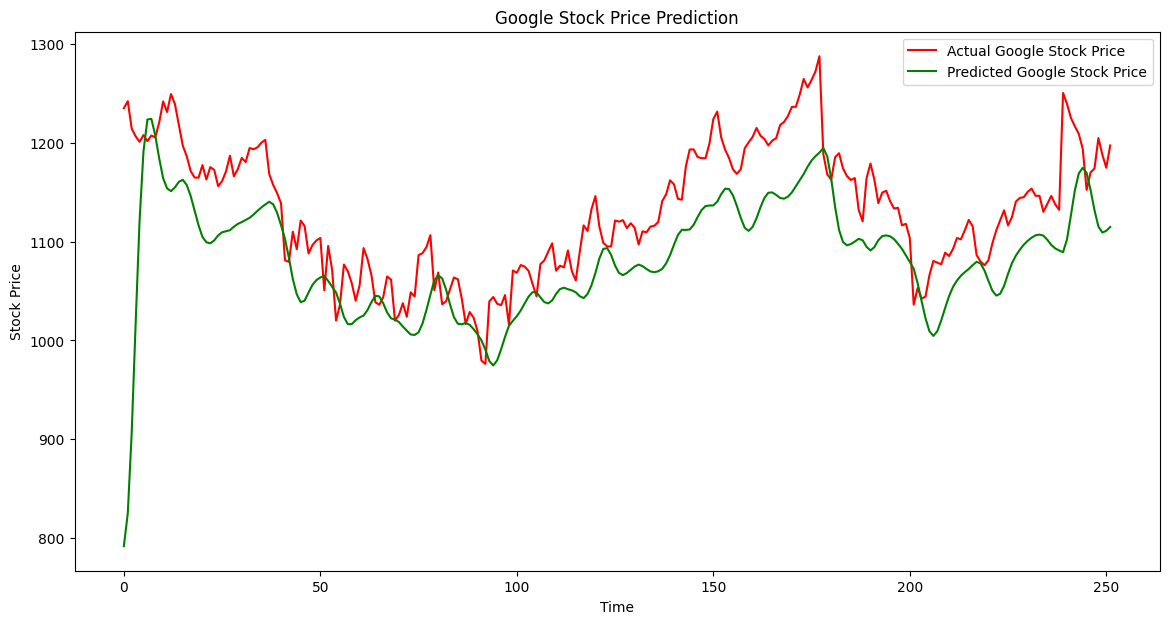

In [9]:
# Predict stock prices
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(real_prices, color='red', label='Actual Google Stock Price')
plt.plot(predicted_prices, color='green', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [10]:
model.save('lstm_model.h5')